# **Next Word Prediction Model** using Python

Next Word Prediction means predicting the most likely word or phrase that will come next in a sentence or text. It is like having an inbuilt feature on an application that suggests the next word as you type or speak. The Next Word Prediction Models are used in applications like messaging apps, search engines, virtual assistants, and autocorrect features on smartphones.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



In [16]:
# Read the text file
with open('sherlock-holm.es_stories_plain-text_advs.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [17]:
#tokenizing the word
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [18]:
# Read the text file
with open('sherlock-holm.es_stories_plain-text_advs.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [19]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [20]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [21]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [22]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [23]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           820000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8200)              1238200   
                                                                 
Total params: 2,208,800
Trainable params: 2,208,800
Non-trainable params: 0
_________________________________________________________________
None


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3010/3010 [==============================] - 249s 82ms/step - loss: 6.2036 - accuracy: 0.0796
Epoch 2/100
3010/3010 [==============================] - 255s 85ms/step - loss: 5.4751 - accuracy: 0.1249
Epoch 3/100
 827/3010 [=======>......................] - ETA: 2:52 - loss: 5.1010 - accuracy: 0.1449

it may take some **more time**
So please keep patient.
result will be like below image.

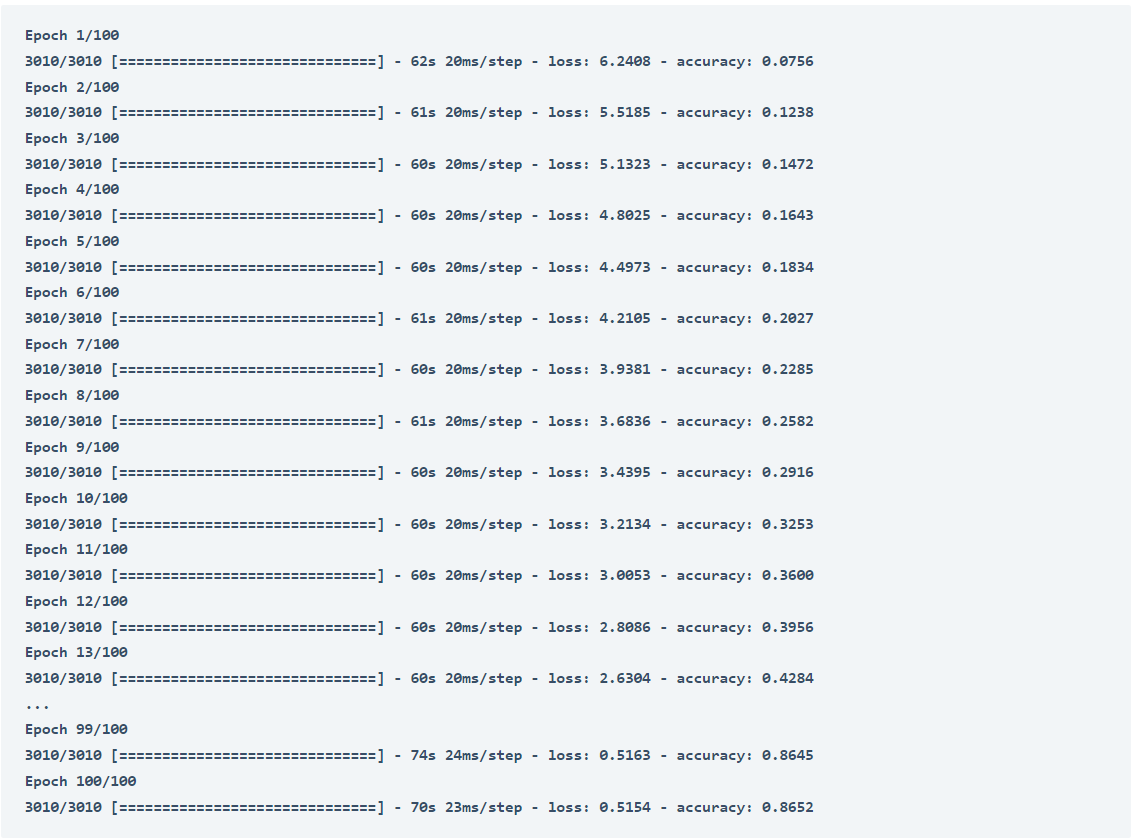

In [24]:
seed_text = "I will leave if they"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 34ms/step
I will leave if they agrees excavating cells


**Next word prediction** is a language modelling task in Machine Learning that aims to predict the most probable word or sequence of words that follows a given input context. This task utilizes statistical patterns and linguistic structures to generate accurate predictions based on the context provided

And Finally== /yd0DDlik+WNDv+Gg22rY2WbpUzA1M96Eek8bC/krbEj9GX13UbPm+tnfmsuyChxPDXMh/6ANh42kF3UbmdLF5dFlUaBTJfXEXZ/B9xISCdRCGHsMzuc1BrTxxRvDPtD